# Making business decisions based on data <a name="introduction"></a>

I'm an analyst at a big online store. Together with the marketing department, I've compiled a list of hypotheses that may help boost revenue.
I need to prioritize these hypotheses, launch an A/B test, and analyze the results.

## Description of the data

**Data used in the first part of the project**

*/datasets/hypotheses_us.csv*
- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

**Data used in the second part of the project**

*/datasets/orders_us.csv*
- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to

*/datasets/visits_us.csv*
- date — date
- group — A/B test group
- visits — the number of visits on the date specified in the A/B test group specified



## Part 1: Prioritizing Hypotheses

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('max_colwidth', 400)

In [2]:
# try-except blocks handle errors that occur from changing file directories

try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
# print head for 'hypotheses_us' DataFrame

hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


Immediately we can see there is a problem with the column names. They should be all lowercase characters. We can quickly fix it with a list comprehension for the *columns* attribute of our DataFrame.

In [4]:
# make all column names lowercase

hypotheses.columns = [col.lower() for col in hypotheses.columns]
hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

### Hypothesis prioritization using ICE
ICE stands for Impact, Confidence, and Effort. It's a formula that allows us to prioritize hypotheses based on these values. Higher ICE scores mean a higher priority. Here is the formula for ICE:

>\begin{align}
ICE & = \frac{Impact \times Confidence}{Effort} \\
\end{align}

In [5]:
# calculate ICE for each hypothesis & sort in descending order

hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


### Hypothesis prioritization using the RICE

RICE stands for Reach, Impact, Confidence, and Effort. It's a modified version of ICE, and also uses a formula that allows us to prioritize hypotheses. Higher RICE scores also mean a higher priority. Here is the formula for RICE:

>\begin{align}
RICE & = \frac{Reach \times Impact \times Confidence}{Effort} \\
\end{align}

In [6]:
# calculate RICE for each hypothesis & sort in descending order

hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


#### Conclusion

The Reach rating of each hypothesis made a difference in the rankings. With ICE, hypothesis 8 is our top priority. With RICE, it's hypothesis 7. The Reach of hypothesis 8 is only 1, which is why it dropped significantly down the list when we used RICE. Hypothesis 7 has a reach of 10 (everyone will be effected) and this is why it has such a high RICE score. Hypotheses with a higher reach will have a higher priority. Hypothesis 7 will be to be our number one priority here since it has a RICE score that is more than twice the runner-up on our list.

## Part 2: A/B Test Analysis

### Step 1: Import data

In [7]:
# try-except blocks handle errors that occur from changing file directories

try:
    orders = pd.read_csv('orders_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')
    
try:
    visits = pd.read_csv('visits_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_us.csv')

### Step 2: Data preprocessing

#### General information on data

In [8]:
# first 5 rows of 'orders' & 'visits'

display(orders.head())
display(visits.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# read general info for 'orders' & 'visits'

display(orders.info())
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [10]:
# descriptive statistics for 'orders'

display(orders.describe())
display(visits.describe())

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [11]:
# check for 'orders' & 'visits' for duplicates

print("Number of duplicates in 'orders':", orders.duplicated().sum())
print("Number of duplicates in 'visits':", visits.duplicated().sum())

Number of duplicates in 'orders': 0
Number of duplicates in 'visits': 0


In [12]:
# check if all visitors are in 1 group only

orders.groupby('visitorId')['group'].unique().reset_index().head()

,visitorId,group
0,5114589,[B]
1,6958315,[B]
2,8300375,"[B, A]"
3,11685486,[A]
4,39475350,[B]


##### Conclusion

After our intial overview, we have a few action items and changes that we need to be make before we proceed with our analysis.
- Change the names of the **'transactionId'** and **'visitorId'** columns in the **'orders'** DataFrame to something more readable
- Change the dtypes for the **'date'** columns in the **'orders'** and **'visits'** DataFrame to *datetime*
- Some visitors are in both groups in the 'orders' DataFrame. We need to remove them.
- No missing values or duplicates (no action needed)

#### Changing column names

In [13]:
# change names of transacionID & visitorID columns in 'orders'

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

#### Changing data types

In [14]:
# change data types for 'date' in 'orders' & 'visits'

orders['date'] = orders['date'].astype('datetime64[D]')
visits['date'] = visits['date'].astype('datetime64[D]')

In [15]:
# check that dtypes are correct

display(orders.info())
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

#### Removing visitors in both groups

In [16]:
# find visitors in both groups

visitors_by_group = orders.groupby('visitor_id')['group'].unique().reset_index()
two_groups = visitors_by_group[visitors_by_group['group'].map(len) == 2].reset_index(drop=True)

In [17]:
# drop visitors from both groups from 'orders'

orders = orders[~orders.visitor_id.isin(two_groups.visitor_id)].reset_index(drop=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 39.8+ KB


### Step 3: Analysis

#### Graph cumulative revenue by group

In [18]:
# group daily revenue sums by date & group

orders_groups = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
orders_groups.head()

,date,group,revenue
0,2019-08-01,A,2266.6
1,2019-08-01,B,967.2
2,2019-08-02,A,1468.3
3,2019-08-02,B,2568.1
4,2019-08-03,A,1815.2


In [19]:
# finding cumulative revenues for group A & B

cum_rev_A = orders_groups.query('group == "A"').drop('group', axis=1)
cum_rev_A['cum_rev_group_a'] = cum_rev_A['revenue'].cumsum()
cum_rev_A.drop('revenue', axis=1, inplace=True)

cum_rev_B = orders_groups.query('group == "B"').drop('group', axis=1)
cum_rev_B['cum_rev_group_b'] = cum_rev_B['revenue'].cumsum()
cum_rev_B.drop('revenue', axis=1, inplace=True)

cum_rev = pd.merge(cum_rev_A, cum_rev_B, on='date').set_index('date')
cum_rev.head()

,cum_rev_group_a,cum_rev_group_b
date,,
2019-08-01,2266.6,967.2
2019-08-02,3734.9,3535.3
2019-08-03,5550.1,4606.9
2019-08-04,6225.6,6138.5
2019-08-05,7623.6,7587.8


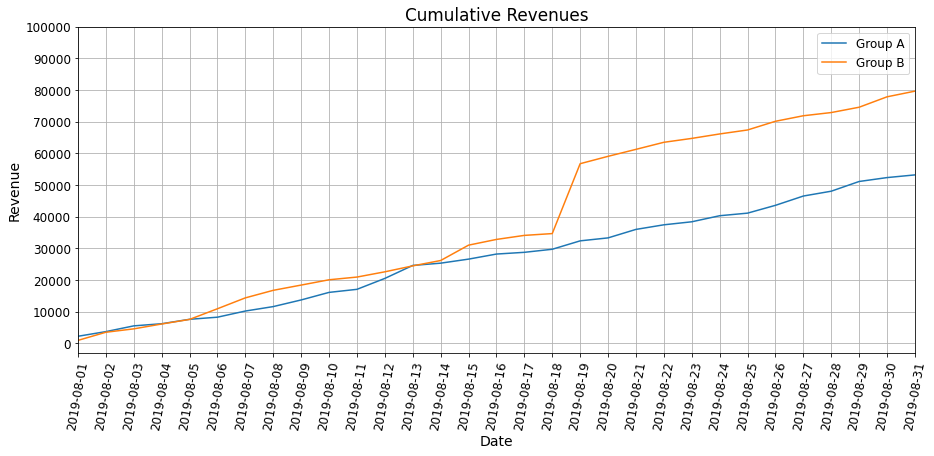

In [20]:
# plotting cumulative revenues for group A & B

plt.rcParams.update({'font.size': 14})

ax = cum_rev.plot(title='Cumulative Revenues', figsize=(15, 6))

ax.set_xlabel('Date')
ax.set_ylabel('Revenue') 

plt.xticks(cum_rev.index, cum_rev.index.date, rotation=80, fontsize=12)
plt.yticks(range(0, 110000, 10000), fontsize=12)
plt.legend(['Group A', 'Group B'], fontsize=12)
plt.grid(True)

plt.show()

##### Conclusion

Group A and Group B were pretty evenly matched in terms of revenues up until the middle of the month. On the 19th, there was a massive spike in cumulative revenue for Group B. This could be due to an unusually large order, or some other difference between groups that we're not seeing.

#### Graph cumulative average order size by group

In [21]:
# find cumulative daily orders per group

means_groups = orders.groupby(['date', 'group']).agg({'revenue': 'sum', 'transaction_id': 'count'})
means_groups.head()

revenue  transaction_id
date       group                         
2019-08-01 A       2266.6              23
           B        967.2              17
2019-08-02 A       1468.3              19
           B       2568.1              23
2019-08-03 A       1815.2              24

In [22]:
# separate groups

means_groups_A = means_groups.query('group == "A"')
means_groups_B = means_groups.query('group == "B"')

In [23]:
# find cumulative daily revenue & orders for each group

pd.options.mode.chained_assignment = None  # default='warn'

means_groups_A['cum_rev'] = means_groups_A['revenue'].cumsum()
means_groups_A['cum_orders'] = means_groups_A['transaction_id'].cumsum()

means_groups_B['cum_rev'] = means_groups_B['revenue'].cumsum()
means_groups_B['cum_orders'] = means_groups_B['transaction_id'].cumsum()

means_groups_B.head()

,,revenue,transaction_id,cum_rev,cum_orders
date,group,,,,
2019-08-01,B,967.2,17,967.2,17
2019-08-02,B,2568.1,23,3535.3,40
2019-08-03,B,1071.6,14,4606.9,54
2019-08-04,B,1531.6,14,6138.5,68
2019-08-05,B,1449.3,21,7587.8,89


In [24]:
# find cumulative mean revenues

means_groups_A['cum_mean_rev'] = means_groups_A['cum_rev'] / means_groups_A['cum_orders']
means_groups_A = means_groups_A.reset_index().drop(['group', 'revenue', 'transaction_id'], axis=1)
means_groups_A.set_index('date', inplace=True)

means_groups_B['cum_mean_rev'] = means_groups_B['cum_rev'] / means_groups_B['cum_orders']
means_groups_B = means_groups_B.reset_index().drop(['group', 'revenue', 'transaction_id'], axis=1)
means_groups_B.set_index('date', inplace=True)

means_groups_B.head()

,cum_rev,cum_orders,cum_mean_rev
date,,,
2019-08-01,967.2,17,56.894118
2019-08-02,3535.3,40,88.382500
2019-08-03,4606.9,54,85.312963
2019-08-04,6138.5,68,90.272059
2019-08-05,7587.8,89,85.256180


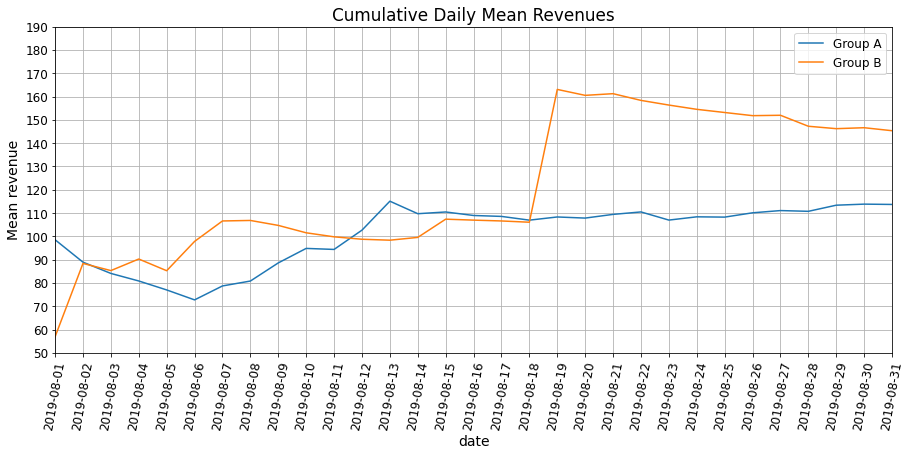

In [25]:
# plotting cumulative means for group A & B

plt.rcParams.update({'font.size': 14})

ax = means_groups_A['cum_mean_rev'].plot(title='Cumulative Daily Mean Revenues',
                                         figsize=(15, 6))

ax.set_xlabel('Date')
ax.set_ylabel('Mean revenue')

means_groups_B['cum_mean_rev'].plot()

plt.xticks(means_groups_A.index, means_groups_A.index.date, rotation=80, fontsize=12)
plt.yticks(range(50, 200, 10), fontsize=12)
plt.legend(['Group A', 'Group B'], fontsize=12)
plt.grid(True)

plt.show()

##### Conclusion

Again, we can see a massive spike in cumulative daily mean for group B. Since the number of orders did not go up proportionally with the revenue for that day, we can conclude that there was probably one unusually large order on that day. 

#### Graph relative difference in cumulative average order size

In [26]:
# find relative difference in cumulative average order size between groups

cum_mean_order_diff = pd.Series(means_groups_B['cum_mean_rev'] - means_groups_A['cum_mean_rev'])
cum_mean_order_diff.head()

date
2019-08-01   -41.653708
2019-08-02    -0.543690
2019-08-03     1.220539
2019-08-04     9.420111
2019-08-05     8.250119
Name: cum_mean_rev, dtype: float64

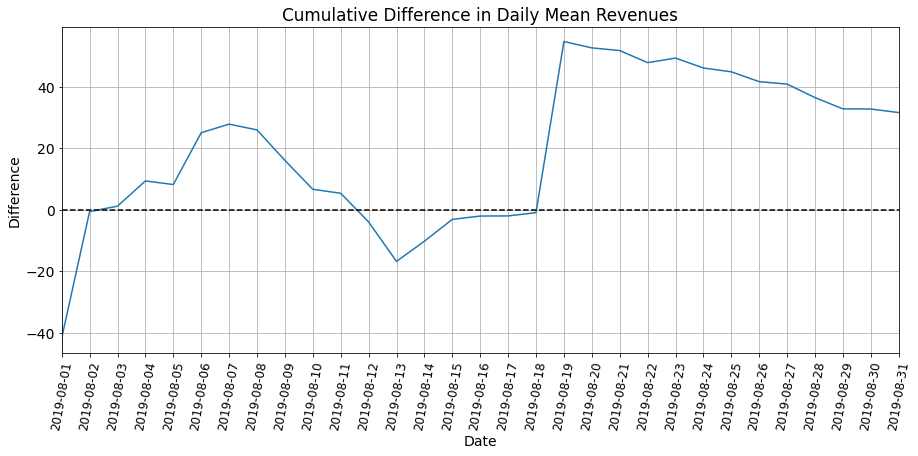

In [27]:
# plotting difference in cumulative means between group B & group A

plt.rcParams.update({'font.size': 14})

ax = cum_mean_order_diff.plot(title='Cumulative Difference in Daily Mean Revenues',
                              figsize=(15, 6))

ax.set_xlabel('Date')
ax.set_ylabel('Difference')

plt.xticks(cum_mean_order_diff.index, cum_mean_order_diff.index.date, rotation=80, fontsize=12)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid(True)

plt.show()

##### Conclusion

Initially, the mean difference favored group B (difference > 0). We saw a small dip where group A had a higher mean revenue and then the massive spike in revenue for group B on the 19th increased the mean revenue for group B for the rest of the test.

#### Graph cumulative daily conversion rates by group

In [28]:
# find number of unique buyers per day by group

group_conversion = orders.groupby(['date', 'group']).agg({'transaction_id': 'nunique'}).reset_index()
group_conversion.columns = ['date', 'group', 'n_orders']
group_conversion.head()

,date,group,n_orders
0,2019-08-01,A,23
1,2019-08-01,B,17
2,2019-08-02,A,19
3,2019-08-02,B,23
4,2019-08-03,A,24


In [29]:
# merge with visits per day by group

group_conversion = group_conversion.merge(visits, on=['date', 'group'])
group_conversion.head()

,date,group,n_orders,visits
0,2019-08-01,A,23,719
1,2019-08-01,B,17,713
2,2019-08-02,A,19,619
3,2019-08-02,B,23,581
4,2019-08-03,A,24,507


In [30]:
# split groups into two DataFrames

group_conversion_A = group_conversion.query('group == "A"').drop('group', axis=1)
group_conversion_B = group_conversion.query('group == "B"').drop('group', axis=1)

group_conversion_B.head()

,date,n_orders,visits
1,2019-08-01,17,713
3,2019-08-02,23,581
5,2019-08-03,14,509
7,2019-08-04,14,770
9,2019-08-05,21,707


In [31]:
# add cumulative buyers & cumulative visits columns

group_conversion_A['cum_n_orders'] = group_conversion_A['n_orders'].cumsum()
group_conversion_A['cum_visits'] = group_conversion_A['visits'].cumsum()
group_conversion_A.set_index('date', inplace=True)

group_conversion_B['cum_n_orders'] = group_conversion_B['n_orders'].cumsum()
group_conversion_B['cum_visits'] = group_conversion_B['visits'].cumsum()
group_conversion_B.set_index('date', inplace=True)

group_conversion_B.head()

,n_orders,visits,cum_n_orders,cum_visits
date,,,,
2019-08-01,17,713,17,713
2019-08-02,23,581,40,1294
2019-08-03,14,509,54,1803
2019-08-04,14,770,68,2573
2019-08-05,21,707,89,3280


In [32]:
# calculate conversion rates per group per day

group_conversion_A['cum_conv_rate'] = group_conversion_A['cum_n_orders'] / group_conversion_A['cum_visits']
group_conversion_B['cum_conv_rate'] = group_conversion_B['cum_n_orders'] / group_conversion_B['cum_visits']

group_conversion_B.head()

,n_orders,visits,cum_n_orders,cum_visits,cum_conv_rate
date,,,,,
2019-08-01,17,713,17,713,0.023843
2019-08-02,23,581,40,1294,0.030912
2019-08-03,14,509,54,1803,0.029950
2019-08-04,14,770,68,2573,0.026428
2019-08-05,21,707,89,3280,0.027134


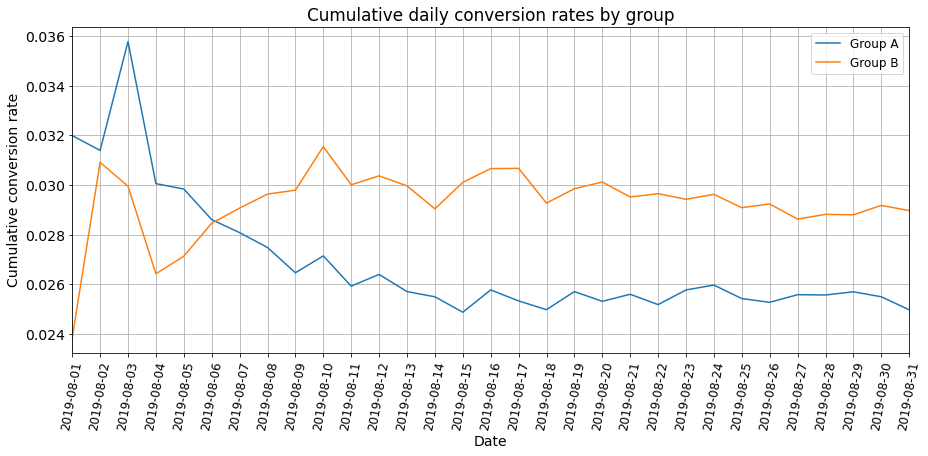

In [33]:
# plotting daily conversion rates for group B & group A

plt.rcParams.update({'font.size': 14})

ax_A = group_conversion_A['cum_conv_rate'].plot(title='Cumulative daily conversion rates by group',
                                                figsize=(15, 6))

ax_B = group_conversion_B['cum_conv_rate'].plot()

ax_B.set_xlabel('Date')
ax_B.set_ylabel('Cumulative conversion rate')

plt.xticks(group_conversion_A.index, group_conversion_A.index.date, rotation=80, fontsize=12)
plt.legend(['Group A', 'Group B'], fontsize=12)
plt.grid(True)

plt.show()

##### Conclusion

Conversion rate seems to be very unstable in the beginning. Initially, Group A is in the lead. But as time progresses and the results stabilize, we can see that B takes the lead bu quite a bit. Later, we'll determine if this difference in conversion rates is statistically significant.

#### Scatter plot of orders per user

In [34]:
# calculate orders per unique user

orders_per_user = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
orders_per_user.columns = ['visitor_id', 'orders']
orders_per_user.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


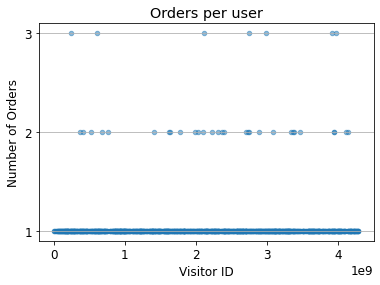

In [35]:
# scatter plot of orders per user

plt.rcParams.update({'font.size': 12})

ax = orders_per_user.plot('visitor_id',
                          'orders',
                          kind='scatter',
                          title='Orders per user',
                          alpha=0.5)

ax.set_xlabel('Visitor ID')
ax.set_ylabel('Number of Orders')

plt.yticks(range(1, 4))
plt.grid(True, axis='y')

plt.show()

##### Conclusion

The vast majority of users place only one order. A significant amount place two orders, and the number of users who place more than two orders is very low. In the next step, we'll define hard cutoffs between anomalies and normal data.

#### 95th & 99th percentiles for orders per user

In [36]:
# find 95th & 99th percentile of orders per user

opu_95, opu_99 = np.percentile(orders_per_user['orders'], [95, 99])

print(f'95% of users make {int(opu_95)} orders or less')
print(f'99% of users make {int(opu_99)} orders or less')

95% of users make 1 orders or less
99% of users make 2 orders or less


Users that make greater than 2 orders can be considered an anomaly, since 99% of all users in this dataset make 2 orders or less.

#### Scatter plot of order prices

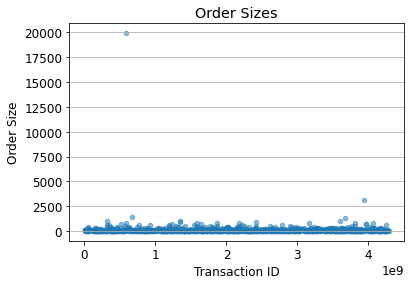

In [37]:
# scatter plot of orders per user

plt.rcParams.update({'font.size': 12})

ax = orders.plot('transaction_id',
                 'revenue',
                 kind='scatter',
                 title='Order Sizes',
                 alpha=0.5)

ax.set_xlabel('Transaction ID')
ax.set_ylabel('Order Size')

plt.grid(True, axis='y')

plt.show()

##### Conclusion

The majority of order revenues fall under 2,500. But there is one massive order of 20,000! Maybe this is the order that skewed our test results in the previous sections... this is definitely an anomaly. Again, we can calculate exact cutoffs between anomalies and normal data by caluculating percentiles in the next step.

#### 95th & 99th percentiles of order sizes

In [38]:
# find 95th & 99th percentile of order sizes

sizes_95, sizes_99 = np.percentile(orders['revenue'], [95, 99])

print(f'95% of orders bring in {sizes_95.round(2)} or less in revenue')
print(f'99% of orders bring in {sizes_99.round(2)} or less in revenue')

95% of orders bring in 414.28 or less in revenue
99% of orders bring in 830.3 or less in revenue


Orders that bring in greater than 830.30 in revenue be considered an anomaly, since 99% of all orders in this dataset cost 830.30 or less.

#### Statistical significance of differences in conversion rate

In [39]:
# get all visits for each group

all_visits_A = visits.query('group == "A"')['visits'].sum()
all_visits_B = visits.query('group == "B"')['visits'].sum()

In [40]:
# create samples of number of orders for each group

sample_A = orders.query('group == "A"').groupby('visitor_id')['transaction_id'].count().reset_index()
sample_A = sample_A.drop('visitor_id', axis=1).sort_values(by='transaction_id', ascending=False).reset_index(drop=True)
sample_A = sample_A.squeeze()
sample_A = sample_A.append(pd.Series(0, index=np.arange(all_visits_A - len(sample_A))))

sample_B = orders.query('group == "B"').groupby('visitor_id')['transaction_id'].count().reset_index()
sample_B = sample_B.drop('visitor_id', axis=1).sort_values(by='transaction_id', ascending=False).reset_index(drop=True)
sample_B = sample_B.squeeze()
sample_B = sample_B.append(pd.Series(0, index=np.arange(all_visits_B - len(sample_B))))

In [41]:
# run Mann-Whitney U test

print('Null hypothesis:\n     There is not a statistically significant difference in conversion rates between groups\n')
print('Alt hypothesis:\n     There is a statistically significant difference in conversion rates between groups\n')

print('Critical significance level (alpha): 0.05\n\n')

print('Test results:')

print("     P-value: {0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print("     Relative difference: {0:.2f}%".format((sample_B.mean() / sample_A.mean() - 1) * 100)) 

Null hypothesis:
     There is not a statistically significant difference in conversion rates between groups

Alt hypothesis:
     There is a statistically significant difference in conversion rates between groups

Critical significance level (alpha): 0.05


Test results:
     P-value: 0.006
     Relative difference: 15.98%


##### Conclusion
The first value is our p-value, which is well below the critical significance level of 0.05. We can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups in favor of the alternative hypothesis - there is a statistically significant difference in conversion rates between groups, with B having a higher conversion rate. The relative gain in conversion rate is 16% (2nd value).

#### Statistical significance of differences in order size

In [42]:
# run Mann-Whitney U test

print('Null hypothesis:\n     There is not a statistically significant difference in average order size between groups\n')
print('Alt hypothesis:\n     There is a statistically significant difference in average order size between groups\n')

print('Critical significance level (alpha): 0.05\n\n')

print('Test results:')

print('     P-value: {0:.3f}'.format(stats.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]))
print('     Relative difference: {0:.2f}%'.format((orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean()-1) * 100)) 

Null hypothesis:
     There is not a statistically significant difference in average order size between groups

Alt hypothesis:
     There is a statistically significant difference in average order size between groups

Critical significance level (alpha): 0.05


Test results:
     P-value: 0.431
     Relative difference: 27.83%


##### Conclusion

The p-value is considerably higher than 0.05, so we can't reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is 27.8% larger than it is for group A.

#### Statistical significance of differences in conversion rate with filtered data

We'll filter the order data based on the cutoffs indicated above and rerun the tests to see if this made any differences in our test results. The 99th percentile cutoff was 2 orders per user. 99% of users made 2 orders or less.

In [43]:
# filter order data

sample_A_filtered = sample_A[sample_A <= 2]
sample_B_filtered = sample_B[sample_B <= 2]

In [44]:
# run Mann-Whitney U test

print('Null hypothesis:\n     There is not a statistically significant difference in conversion rates between groups\n')
print('Alt hypothesis:\n     There is a statistically significant difference in conversion rates between groups\n')

print('Critical significance level (alpha): 0.05\n\n')

print('Test results:')

print("     P-value: {0:.3f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print("     Relative difference: {0:.2f}%".format((sample_B_filtered.mean() / sample_A_filtered.mean() - 1) * 100))

Null hypothesis:
     There is not a statistically significant difference in conversion rates between groups

Alt hypothesis:
     There is a statistically significant difference in conversion rates between groups

Critical significance level (alpha): 0.05


Test results:
     P-value: 0.004
     Relative difference: 18.49%


##### Conclusion

Filtering the data made a small difference in our test. The p-value is still well below the critical significance value of 0.05. The relative difference in conversion rates between groups actuall rose to 18.5% by removing the anomalies.

#### Statistical significance of differences in order size with filtered data

We'll filter the revenue data based on the cutoffs indicated above and rerun the tests to see if this made any differences in our test results. The 99th percentile cutoff for order sizes was 830.30.

In [45]:
# filter revenue data

filtered_revenue_A = orders.query('(group == "A") & (revenue <= 830.3)')['revenue']
filtered_revenue_B = orders.query('(group == "B") & (revenue <= 830.3)')['revenue']

In [46]:
# run Mann-Whitney U test

print('Null hypothesis:\n     There is not a statistically significant difference in average order size between groups\n')
print('Alt hypothesis:\n     There is a statistically significant difference in average order size between groups\n')

print('Critical significance level (alpha): 0.05\n\n')

print('Test results:')

print('     P-value: {0:.3f}'.format(stats.mannwhitneyu(filtered_revenue_A, filtered_revenue_B)[1]))
print('     Relative difference: {0:.2f}%'.format((filtered_revenue_B.mean() / filtered_revenue_A.mean()-1) * 100)) 

Null hypothesis:
     There is not a statistically significant difference in average order size between groups

Alt hypothesis:
     There is a statistically significant difference in average order size between groups

Critical significance level (alpha): 0.05


Test results:
     P-value: 0.467
     Relative difference: -3.12%


##### Conclusion

The p-value is still considerably higher than 0.05, so we still can't reject the null hypothesis and conclude that average order size differs between the groups. However, the difference in average order size has decreased drastically now that we have removed the the anomalies from both groups.

### Step 4: What Next?

We're faced with 3 choices moving forward:
1. Stop the test, consider one of the groups the leader
2. Stop the test, conclude that there is no difference between the groups
3. Continue the test

The best option will be option 1 based on the data analyis carried out thus far. Group B outperformed group A in conversion rate by over 15% when filtering out unusually high order counts. The difference was proven to be statistically significant.

We couldn't say the differences in average order sizes were statistically significant. And even if they were, when we filtered out the anomalies in order size, the difference dropped to under 3.1%. In that regard, the samples are similar. Either way, group B still has a higher conversion rate and we should investigate why this is the case and see if we can improve further.